## Import 1: Classes and Path

In [52]:
%%bash
echo $PYTHONPATH

In [1]:
# Import 1. 
# Import functions.py into notebook from src folder. 
import sys

# Path relative to your notebook.
PY_DIR="/home/sean/joel-crime/DC-Metro-Crime-Data-2007---2017/"
DATA_DIR="/home/sean/joel-crime/DC-Metro-Crime-Data-2007---2017/data"
sys.path.append(PY_DIR)


# Import my .py classes.
# import .clean
# import .plot
from src import clean
from src import plot


# Auto reload.
%load_ext autoreload
%reload_ext autoreload

## Import 2: All Libs

In [2]:
# Import 2.
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib import style
import folium
from folium.plugins import HeatMap

## Read File & Drop First Two Rows

In [3]:
# Read file in and drop first two rows.
# First two rows seem to make like no sense with the rest of this data set.
# Plan is to drop them.
# Use clean class and init a cleaner object.
cleaner = clean.Clean()

df = cleaner.read_file(f'{DATA_DIR}/dc_crime_add_vars.csv')
df = df.drop(['Unnamed: 0', 'X'], axis=1)
df.head()

,REPORT_DAT,SHIFT,OFFENSE,METHOD,BLOCK,DISTRICT,PSA,WARD,ANC,NEIGHBORHOOD_CLUSTER,...,year,month,day,hour,minute,second,EW,NS,quad,crimetype
0,8/31/2008 8:47:00 PM,EVENING,THEFT/OTHER,OTHERS,3500 - 3599 BLOCK OF R STREET NW,2.0,206.0,2,2E,Cluster 4,...,2008,8,31,20,47,0,West,North,Northwest,Non-Violent
1,9/1/2008 12:45:00 AM,MIDNIGHT,MOTOR VEHICLE THEFT,OTHERS,2000 - 2015 BLOCK OF O STREET NW,2.0,208.0,2,2B,Cluster 6,...,2008,9,1,0,45,0,West,North,Northwest,Non-Violent
2,9/1/2008 3:00:00 AM,MIDNIGHT,THEFT/OTHER,OTHERS,700 - 799 BLOCK OF 11TH STREET NW,1.0,101.0,2,2C,Cluster 8,...,2008,9,1,3,0,0,East,North,Northeast,Non-Violent
3,9/9/2008 7:46:00 AM,DAY,THEFT/OTHER,OTHERS,1700 - 1799 BLOCK OF P STREET NW,2.0,208.0,2,2B,Cluster 6,...,2008,9,9,7,46,0,West,North,Northwest,Non-Violent
4,8/24/2008 8:00:00 PM,EVENING,MOTOR VEHICLE THEFT,OTHERS,500 - 599 BLOCK OF INDIANA AVENUE NW,1.0,102.0,2,2C,Cluster 8,...,2008,8,24,20,0,0,East,North,Northeast,Non-Violent


## Describing the Dataset

In [4]:
# Describing the Dataset 1.
df.describe()

,DISTRICT,PSA,WARD,CENSUS_TRACT,CCN,XBLOCK,YBLOCK,year,month,day,hour,minute,second
count,342667.000000,342616.000000,342867.000000,341776.000000,3.428670e+05,342867.000000,342867.000000,342867.000000,342867.000000,342867.000000,342867.000000,342867.000000,342867.000000
mean,3.727415,378.080069,4.449501,6218.780511,1.265285e+07,-77.008139,38.905970,2012.543651,6.655686,15.979505,13.228853,26.294750,6.789986
std,1.977502,197.334627,2.378859,3137.022064,2.845777e+06,0.036324,0.031595,2.810362,3.327466,8.760185,6.233693,18.106904,14.926954
min,1.000000,101.000000,1.000000,100.000000,1.000600e+05,-77.113642,38.813470,2008.000000,1.000000,1.000000,0.000000,0.000000,0.000000
25%,2.000000,206.000000,2.000000,3500.000000,1.012491e+07,-77.032380,38.890940,2010.000000,4.000000,8.000000,9.000000,10.000000,0.000000
50%,4.000000,401.000000,5.000000,7000.000000,1.303074e+07,-77.013122,38.906430,2013.000000,7.000000,16.000000,14.000000,28.000000,0.000000
75%,5.000000,507.000000,6.000000,8904.000000,1.510258e+07,-76.985523,38.925286,2015.000000,9.000000,23.000000,18.000000,42.000000,0.000000
max,7.000000,708.000000,8.000000,11100.000000,9.943899e+07,-76.910010,38.994901,2017.000000,12.000000,31.000000,23.000000,59.000000,59.000000


In [ ]:
# Describing the Dataset 2.
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 342867 entries, 0 to 342866
Data columns (total 30 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   REPORT_DAT            342867 non-null  object 
 1   SHIFT                 342867 non-null  object 
 2   OFFENSE               342867 non-null  object 
 3   METHOD                342867 non-null  object 
 4   BLOCK                 342867 non-null  object 
 5   DISTRICT              342667 non-null  float64
 6   PSA                   342616 non-null  float64
 7   WARD                  342867 non-null  int64  
 8   ANC                   342867 non-null  object 
 9   NEIGHBORHOOD_CLUSTER  338162 non-null  object 
 10  BLOCK_GROUP           341776 non-null  object 
 11  CENSUS_TRACT          341776 non-null  float64
 12  VOTING_PRECINCT       342783 non-null  object 
 13  CCN                   342867 non-null  int64  
 14  START_DATE            342854 non-null  object 
 15  

In [ ]:
# Describing the Dataset 3.
df.index

RangeIndex(start=0, stop=342867, step=1)

In [ ]:
# Describing the Dataset 4.
df.columns

Index(['REPORT_DAT', 'SHIFT', 'OFFENSE', 'METHOD', 'BLOCK', 'DISTRICT', 'PSA',
       'WARD', 'ANC', 'NEIGHBORHOOD_CLUSTER', 'BLOCK_GROUP', 'CENSUS_TRACT',
       'VOTING_PRECINCT', 'CCN', 'START_DATE', 'END_DATE', 'XBLOCK', 'YBLOCK',
       'optional', 'date', 'year', 'month', 'day', 'hour', 'minute', 'second',
       'EW', 'NS', 'quad', 'crimetype'],
      dtype='object')

<Figure size 1000x600 with 0 Axes>

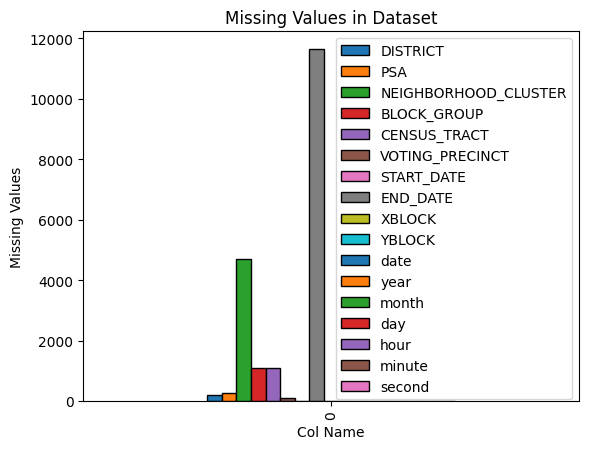

In [5]:
# Describing the Dataset 5.
missing_v = df.isnull().sum()
missing_v

# To viz - make new dataframe of al missing values.
data = {
    'DISTRICT': [200],
    'PSA': [251],
    'NEIGHBORHOOD_CLUSTER': [4705],
    'BLOCK_GROUP': [1091],
    'CENSUS_TRACT': [1091],
    'VOTING_PRECINCT': [84],
    'START_DATE': [13],
    'END_DATE': [11651],
    'XBLOCK': [0],
    'YBLOCK': [0],
    'date': [0],
    'year': [0],
    'month': [0],
    'day': [0],
    'hour': [0],
    'minute': [0],
    'second': [0]
}

# Show the missing data.
df_bar = pd.DataFrame(data)

# Figsize.
# Use dataframe plot featuer covered in week 4.
plt.figure(figsize=(10, 6))
df_bar.plot(kind='bar', edgecolor='black')

# Labels and title.
plt.xlabel('Col Name')
plt.ylabel('Missing Values')
plt.title('Missing Values in Dataset')

# plt.show().
plt.show()

In [6]:
# Describing the Dataset 6.
# Went from 342867 to 325340 = 17527 removed which is roughly 5% of the dataset. 
df = cleaner.drop_rows_with_missing_data(df)
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 325340 entries, 0 to 342866
Data columns (total 30 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   REPORT_DAT            325340 non-null  object 
 1   SHIFT                 325340 non-null  object 
 2   OFFENSE               325340 non-null  object 
 3   METHOD                325340 non-null  object 
 4   BLOCK                 325340 non-null  object 
 5   DISTRICT              325340 non-null  float64
 6   PSA                   325340 non-null  float64
 7   WARD                  325340 non-null  int64  
 8   ANC                   325340 non-null  object 
 9   NEIGHBORHOOD_CLUSTER  325340 non-null  object 
 10  BLOCK_GROUP           325340 non-null  object 
 11  CENSUS_TRACT          325340 non-null  float64
 12  VOTING_PRECINCT       325340 non-null  object 
 13  CCN                   325340 non-null  int64  
 14  START_DATE            325340 non-null  object 
 15  END_D

In [7]:
# Describing the Dataset 7.
# Using the function that formats the nubers and spits out df.describe().
cleaner.describe_dataframe(df)

,DISTRICT,PSA,WARD,CENSUS_TRACT,CCN,XBLOCK,YBLOCK,year,month,day,hour,minute,second
count,"325,340","325,340","325,340","325,340","325,340","325,340","325,340","325,340","325,340","325,340","325,340","325,340","325,340"
mean,4,375,4,"6,184","12,693,307",-77,39,"2,013",7,16,13,26,7
std,2,196,2,"3,138","2,843,354",0,0,3,3,9,6,18,15
min,1,101,1,100,"100,060",-77,39,"2,008",1,1,0,0,0
25%,2,206,2,"3,500","10,136,018",-77,39,"2,010",4,8,9,10,0
50%,3,308,5,"7,000","13,051,711",-77,39,"2,013",7,16,14,28,0
75%,5,507,6,"8,904","15,105,125",-77,39,"2,015",9,23,18,42,0
max,7,708,8,"11,100","99,438,989",-77,39,"2,017",12,31,23,59,59


In [8]:
# Describing the Dataset 8
# Using the function that spits outdict of col names and dtypes. 
cleaner.get_column_features(df)

{'REPORT_DAT': dtype('O'),
 'SHIFT': dtype('O'),
 'OFFENSE': dtype('O'),
 'METHOD': dtype('O'),
 'BLOCK': dtype('O'),
 'DISTRICT': dtype('float64'),
 'PSA': dtype('float64'),
 'WARD': dtype('int64'),
 'ANC': dtype('O'),
 'NEIGHBORHOOD_CLUSTER': dtype('O'),
 'BLOCK_GROUP': dtype('O'),
 'CENSUS_TRACT': dtype('float64'),
 'VOTING_PRECINCT': dtype('O'),
 'CCN': dtype('int64'),
 'START_DATE': dtype('O'),
 'END_DATE': dtype('O'),
 'XBLOCK': dtype('float64'),
 'YBLOCK': dtype('float64'),
 'optional': dtype('bool'),
 'date': dtype('O'),
 'year': dtype('int64'),
 'month': dtype('int64'),
 'day': dtype('int64'),
 'hour': dtype('int64'),
 'minute': dtype('int64'),
 'second': dtype('int64'),
 'EW': dtype('O'),
 'NS': dtype('O'),
 'quad': dtype('O'),
 'crimetype': dtype('O')}

## Slice DF for Only Homicides

In [82]:
pd.to_datetime(df['START_DATE'])

/tmp/ipykernel_14523/4046787940.py:1: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  pd.to_datetime(df['START_DATE'])


0        2008-08-30 21:30:00
1        2008-08-31 19:30:00
2        2008-08-31 23:00:00
3        2008-09-09 07:10:00
4        2008-08-05 12:00:00
                 ...        
342862   2008-03-21 00:30:00
342863   2008-03-21 00:30:00
342864   2008-03-14 12:00:00
342865   2008-03-20 22:00:00
342866   2008-03-21 16:30:00
Name: START_DATE, Length: 325340, dtype: datetime64[ns]

In [9]:
# Can use this is need to or can slice the other df accordingly (really dealer choice).
# Slice df to only include the offense of homicide.

# Convert datetimes.
# https://pandas.pydata.org/docs/reference/api/pandas.to_datetime.html 

# Make new start and end hour column.
# Might need this for the corr matrix? 
df_2 = df[df['OFFENSE']=='HOMICIDE']
df_2['START_DATE'] = pd.to_datetime(df_2['START_DATE'])
df_2['END_DATE'] = pd.to_datetime(df_2['END_DATE'])
df_2['start_hour'] = df_2['START_DATE'].dt.hour
df_2['end_hour'] = df_2['START_DATE'].dt.hour
df_2 = df_2.drop('hour', axis=1)
df_2.head()

/tmp/ipykernel_19395/1412509490.py:10: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df_2['START_DATE'] = pd.to_datetime(df_2['START_DATE'])
/tmp/ipykernel_19395/1412509490.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_2['START_DATE'] = pd.to_datetime(df_2['START_DATE'])
/tmp/ipykernel_19395/1412509490.py:11: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df_2['END_DATE'] = pd.to_datetime(df_2['END_DATE'])
/tmp/ipykernel_19395/1412509490.py:11: SettingWithCopyWar

,REPORT_DAT,SHIFT,OFFENSE,METHOD,BLOCK,DISTRICT,PSA,WARD,ANC,NEIGHBORHOOD_CLUSTER,...,month,day,minute,second,EW,NS,quad,crimetype,start_hour,end_hour
581,9/17/2008 12:00:00 AM,MIDNIGHT,HOMICIDE,OTHERS,N STREET NW AND 8TH STREET NW,3,308,2,6E,Cluster 7,...,9,17,0,0,East,North,Northeast,Violent,23,23
839,9/28/2008 12:00:00 AM,MIDNIGHT,HOMICIDE,GUN,1400 - 1499 BLOCK OF U STREET NW,3,301,2,2B,Cluster 3,...,9,28,0,0,East,North,Northeast,Violent,16,16
2032,12/24/2008 12:00:00 AM,MIDNIGHT,HOMICIDE,OTHERS,2431 - 2479 BLOCK OF VIRGINIA AVENUE NW,2,207,2,2A,Cluster 5,...,12,24,0,0,West,North,Northwest,Violent,8,8
2099,12/16/2008 12:00:00 AM,MIDNIGHT,HOMICIDE,GUN,11TH STREET NW AND Q STREET NW,3,307,2,6E,Cluster 7,...,12,16,0,0,East,North,Northeast,Violent,3,3
7438,8/9/2010 12:00:00 AM,MIDNIGHT,HOMICIDE,KNIFE,1100 - 1199 BLOCK OF 10TH STREET NW,3,307,2,2F,Cluster 8,...,8,9,0,0,East,North,Northeast,Violent,18,18


In [10]:
# Can use this is need to or can slice the other df accordingly (same statement as above).

# 1100 rows now.
hom_df = df_2

# Slicing df one last time to get only my desired columns.
hom_df = hom_df[['REPORT_DAT',
                'SHIFT',
                'OFFENSE',
                'METHOD',
                'BLOCK',
                'DISTRICT',
                'PSA',
                'WARD',
                'ANC',
                'NEIGHBORHOOD_CLUSTER',
                'BLOCK_GROUP',
                'VOTING_PRECINCT',
                'START_DATE',
                'END_DATE',
                'XBLOCK',
                'YBLOCK',
                'date',
                'year',
                'start_hour',
                'end_hour',
                'crimetype']]

# Show that it worked .. 
hom_df.columns

Index(['REPORT_DAT', 'SHIFT', 'OFFENSE', 'METHOD', 'BLOCK', 'DISTRICT', 'PSA',
       'WARD', 'ANC', 'NEIGHBORHOOD_CLUSTER', 'BLOCK_GROUP', 'VOTING_PRECINCT',
       'START_DATE', 'END_DATE', 'XBLOCK', 'YBLOCK', 'date', 'year',
       'start_hour', 'end_hour', 'crimetype'],
      dtype='object')

## Q1: Have homicides increased over this specified decade?

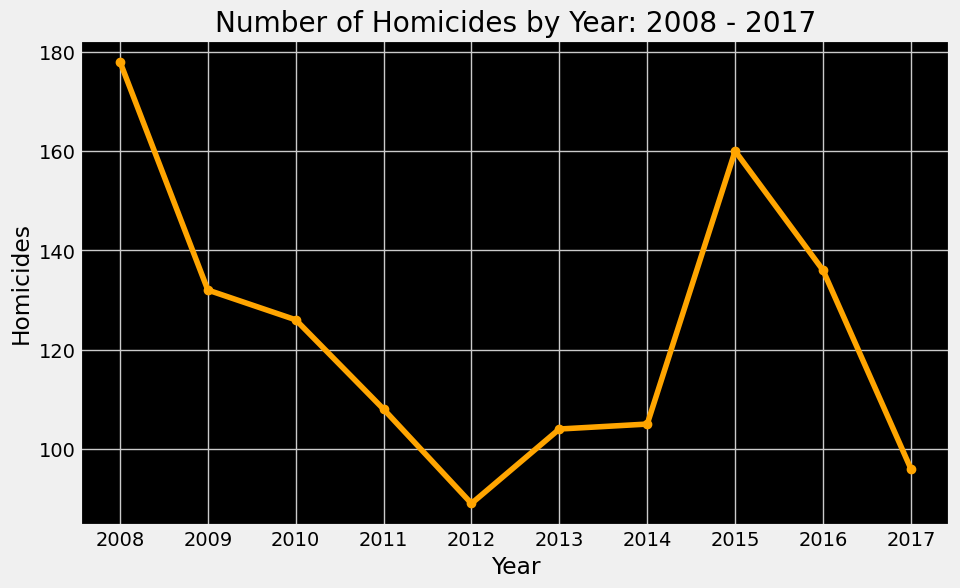

In [4]:
# Q1: Have homicides increased over this decade?
# Line Chart

# Slice df or I could use the other one above.. 
homicides_df = df[df['OFFENSE'] == 'HOMICIDE']

# Group the data by year and count the number of homicides per year.
# https://pandas.pydata.org/docs/reference/api/pandas.core.groupby.DataFrameGroupBy.size.html
homicides_by_year = homicides_df.groupby('year').size()

# Make an object out of my PLot class.
plotter = plot.Plot()

# Use line chart method to make my graph! 
plotter.line_chart(homicides_by_year, 'Year', 'Homicides', 'Number of Homicides by Year: 2008 - 2017')

## Q2: Which voting wards had the highest number of homicides?

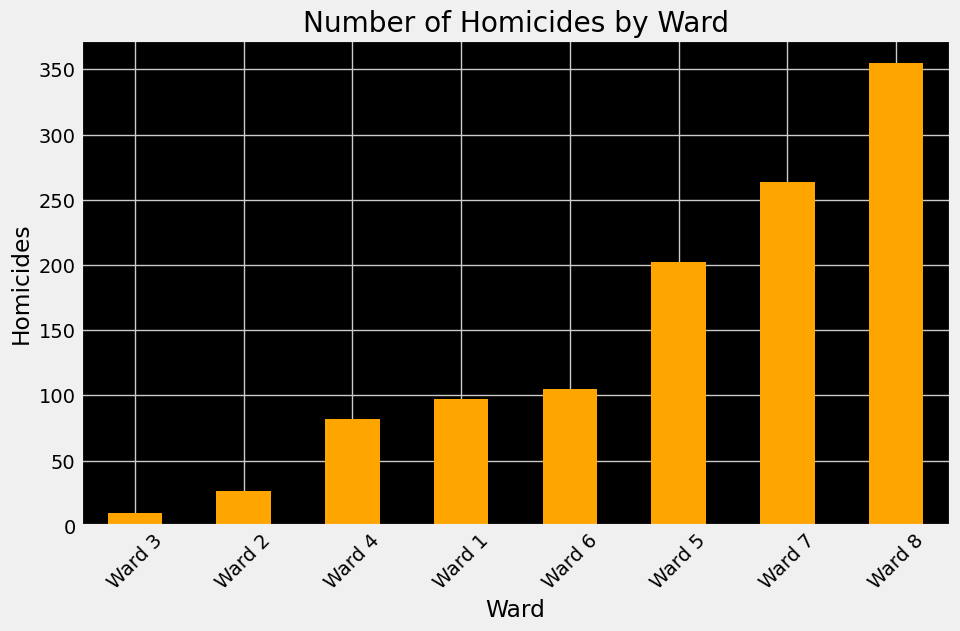

In [ ]:
# Q2: Which voting wards had the highest number of homicides?
# Bar Chart. 

# Slice df or I could use the other one above.. 
homicides_df = df[df['OFFENSE'] == 'HOMICIDE']

# Get homicides by ward (need value counts and sort values for descending order).
homicides_by_location = homicides_df['WARD'].value_counts().sort_values()

# Already have my plotter object from the line chart. 
# Use bar chart method to make my graph! 
plotter.bar_chart(homicides_by_location, 'Ward', 'Homicides', 'Number of Homicides by Ward')

## Q3: Is there any correlation between the time of the day and the occurrence of homicides?

In [5]:
df['REPORT_DAT']

0         8/31/2008 8:47:00 PM
1         9/1/2008 12:45:00 AM
2          9/1/2008 3:00:00 AM
3          9/9/2008 7:46:00 AM
4         8/24/2008 8:00:00 PM
                  ...         
342862    3/21/2008 1:00:00 PM
342863    3/21/2008 9:08:00 PM
342864    3/21/2008 4:30:00 PM
342865    3/21/2008 5:15:00 PM
342866    3/21/2008 6:30:00 PM
Name: REPORT_DAT, Length: 342867, dtype: object

In [41]:
def fifteen(n):
    if pd.isna(n):
        return -1
    else:
        return round((n*2))/2




In [38]:

fifteen(98.2)

98.16666666666667

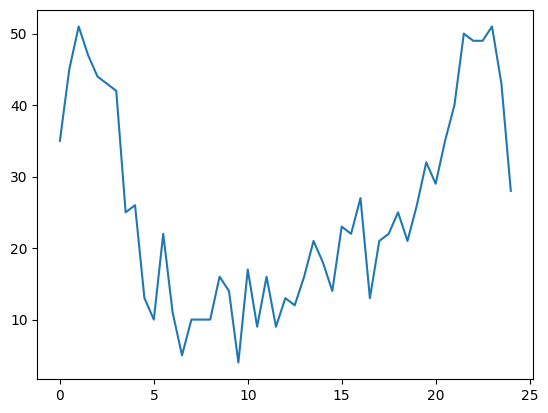

In [42]:


TIME_COL='START_DATE'
df['Time_of_Day'] = pd.to_datetime(df[TIME_COL],format="%m/%d/%Y %I:%M:%S %p",errors='coerce').dt.hour.astype('Float64')+(pd.to_datetime(df[TIME_COL],format="%m/%d/%Y %I:%M:%S %p",errors='coerce').dt.minute /60.0 ).astype('Float64')
df=df.dropna(subset=['Time_of_Day'])
# df['Time_of_Day'].describe()
df['Time_of_Day']=df['Time_of_Day'].apply(fifteen)
df['Time_of_Day'].describe()
df['Homicide'] = df['OFFENSE'].apply(lambda x: 1 if 'HOMICIDE' in x else 0)
grouped= df.groupby('Time_of_Day').agg('sum')['Homicide']
grouped.head(25)
# plt.figure(figsize=(10,6))
plt.plot(grouped.index,grouped.values)
plt.show()


In [43]:
import scipy.stats

spearman_corr, p_value = scipy.stats.spearmanr(grouped.index, grouped.values)
print(f"p-value: {p_value}")

p-value: 0.14688451174081138


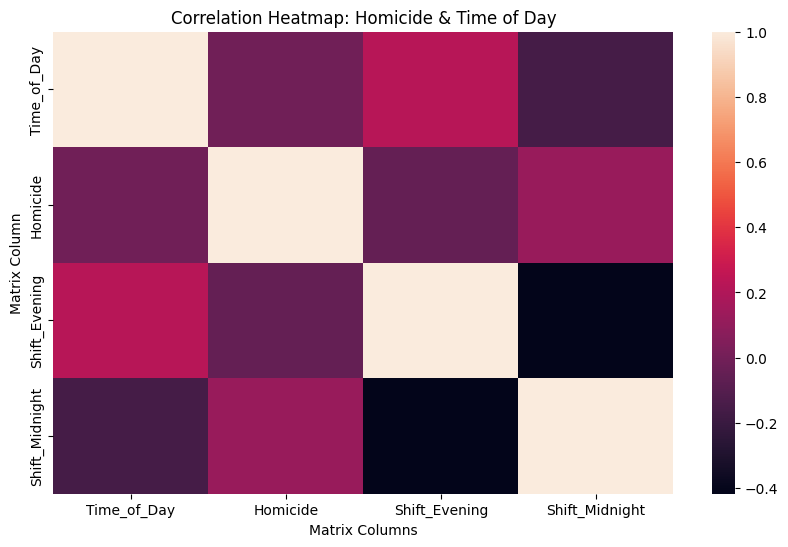

In [24]:
# Q3: Is there any correlation between the time of the day and the occurrence of homicides?
# Heat Map.
# This one gets a little funky.

# Extract the hour from the 'REPORT_DAT' column.
# Seems to be more stable then the actaul hour column?
# df['Time_of_Day'] = pd.to_datetime(df['REPORT_DAT']).dt.hour

# Create a binary(dummy) column for the category based columns.
# https://codereview.stackexchange.com/questions/251690/create-dummy-variables-in-dataframe-using-for-loop-and-apply-lambda
df['Homicide'] = df['OFFENSE'].apply(lambda x: 1 if 'HOMICIDE' in x else 0)
df['Shift_Evening'] = df['SHIFT'].apply(lambda x: 1 if 'EVENING' in x else 0)
df['Shift_Midnight'] = df['SHIFT'].apply(lambda x: 1 if 'MIDNIGHT' in x else 0)

# Select the columns of interest for corr df.
correlation_df= df[['Time_of_Day', 'Homicide', 'Shift_Evening', 'Shift_Midnight']]
corr_matrix = correlation_df.corr()
plotter=plot.Plot()
# Already have my plotter object from the line chart. 
# Use heatmap method to make my graph! 
plotter.heatmap(corr_matrix, 'Matrix Columns', 'Matrix Column', 'Correlation Heatmap: Homicide & Time of Day')

## Q4: Are homicides more likely to occur with a gun or a knife? 

<Figure size 1600x1200 with 0 Axes>

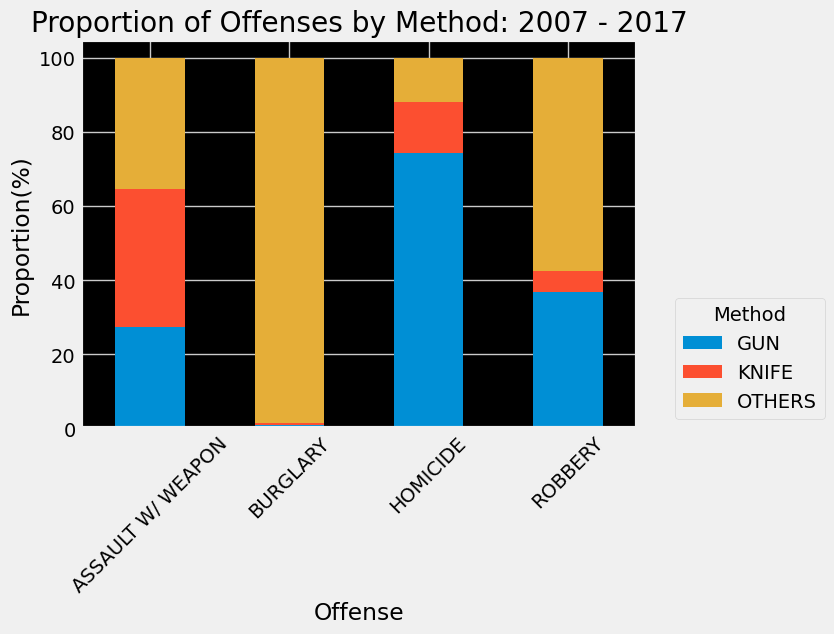

In [ ]:
# Q4: Are homicides more likely to occur with a gun or a knife? 
# Stacked Plot.

# First name is way to long for graph. 
# https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.replace.html?highlight=replace#pandas.DataFrame.replace
df['OFFENSE'] = df['OFFENSE'].replace('ASSAULT W/DANGEROUS WEAPON', 'ASSAULT W/ WEAPON')

# Select list of 'violent' offenses to put up next to murder to show contrast. 
offenses = ['HOMICIDE', 'ROBBERY', 'ASSAULT W/ WEAPON', 'BURGLARY']

# Filter the DataFrame using isin cause i keep getting value error when I dont do that?
# https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.isin.html 
filtered_df = df[df['OFFENSE'].isin(offenses)]

# Group the data by offense and method, and count.
# .size()is used after grouping the data to count the number of occurrences -
# for each group.
# .unstack() is applied to a hierarchical index (such as the result of a groupby operation) -
# and reshapes the data by "unstacking" one level of the index to create columns. 
# Used the many stacked bar chart examples we have done in the class.
grouped_data = filtered_df.groupby(['OFFENSE', 'METHOD']).size().unstack()

# Calculate the proportions for each method within each offense.
# Wanted to show the precent so just had to times the decimal by 100.
# https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.div.html was handy even though could of done '/'.
grouped_data_proportions = grouped_data.div(grouped_data.sum(axis=1), axis=0) * 100

# Already have my plotter object from the line chart. 
# Use stacked method to make my graph!
plotter.stacked(grouped_data_proportions, 'Offense', 'Proportion(%)', 'Proportion of Offenses by Method: 2007 - 2017')

## Q5a: Which voting ward has the highest number of homicides over the last decade?

In [ ]:
# Q5a: Which voting ward has the highest number of homicides over the last decade?
# First of two folium heatmaps. 
# Filter the DataFrame to include only homicides.
homicides_df = df[df['OFFENSE'] == 'HOMICIDE']

# Group the data by ward and count the number of homicides in each ward.
WARD_homicide_counts = homicides_df['WARD'].value_counts()

# Find the ward with the highest amount of homicides.
# Used idxmax from previous week's exposure. 
WARD_with_highest_homicides = WARD_homicide_counts.idxmax()

# Filter the DataFrame to include only the data for the ward with the highest amount of homicides.
WARD_homicides_df = homicides_df[homicides_df['WARD'] == WARD_with_highest_homicides]

# Already have my plotter object from line chart. 
# Use folium_heat method to make my graph!
plotter.folium_heat(WARD_homicides_df, homicides_df, 'WARD', 'WARD 8', 8, 38.8457, -77.0097)

## Q5b: Which police service area had the highest number of homicides over the last decade?

In [ ]:
# Q5b: Which police service area had the highest number of homicides over the last decade?
# Second of two folium heatmaps. 
# Filter the DataFrame to include only homicides.
homicides_df = df[df['OFFENSE'] == 'HOMICIDE']

# Group the data by PSA and count the number of homicides in each PSA.
PSA_homicide_counts = homicides_df['PSA'].value_counts()

# Find the PSA with the highest amount of homicides. 
# Used idxmax from previous week's exposure. 
PSA_with_highest_homicides = PSA_homicide_counts.idxmax()

# Filter the DataFrame to include only the data for the PSA with the highest amount of homicides.
PSA_homicides_df = homicides_df[homicides_df['PSA'] == PSA_with_highest_homicides]

# Already have my plotter object from line chart. 
# Use folium_heat method to make my graph!
plotter.folium_heat(PSA_homicides_df, homicides_df, 'PSA', 'PSA 604', 604, 38.8851, -76.9158)